In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

## importing data and exploring

In [3]:
df = pd.read_csv(r'data.csv', header=None)
df.shape  # size of the table

(512, 10)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,2.12532,-8.35859,-9.39368,8.56843,8.78855,6.32030,-4.73014,-6.92553,3.68487,-1.20625
1,-10.15949,9.97078,8.04821,-4.82858,-6.30387,-6.97885,-3.21693,0.88861,-0.46591,-3.54025
2,-2.50408,8.77970,3.22451,1.55252,-7.22234,-7.68239,-8.99961,7.72757,3.90849,4.33603
3,-7.33024,-1.95436,-8.70898,8.48457,-4.18574,4.30856,-3.39816,0.54945,0.05314,-7.01513
4,-10.05601,9.74470,6.60193,-5.27618,-6.28668,-7.61490,-2.91889,0.00137,-2.91768,-4.60353


In [5]:
df.columns = [f'feat{i}' for i in np.arange(1,11)] # add column names
df.head()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10
0,2.12532,-8.35859,-9.39368,8.56843,8.78855,6.32030,-4.73014,-6.92553,3.68487,-1.20625
1,-10.15949,9.97078,8.04821,-4.82858,-6.30387,-6.97885,-3.21693,0.88861,-0.46591,-3.54025
2,-2.50408,8.77970,3.22451,1.55252,-7.22234,-7.68239,-8.99961,7.72757,3.90849,4.33603
3,-7.33024,-1.95436,-8.70898,8.48457,-4.18574,4.30856,-3.39816,0.54945,0.05314,-7.01513
4,-10.05601,9.74470,6.60193,-5.27618,-6.28668,-7.61490,-2.91889,0.00137,-2.91768,-4.60353


In [6]:
df.describe()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,-0.087443,0.197837,-0.483539,60.156827,-0.791395,2.125777,-4.347714,-0.805933,-1.520518,-2.045717
std,7.261522,8.115561,8.685507,1294.032720,6.928449,6.984241,6.208412,7.232962,6.470639,7.269857
min,-11.670240,-10.082390,-12.514370,-8.649470,-10.120890,-8.530720,-11.458070,-11.689530,-11.291580,-10.831800
25%,-5.178650,-6.039293,-8.713907,-2.739032,-5.681985,-2.426920,-7.598878,-6.874258,-5.219765,-7.015092
50%,0.036590,-2.470470,2.834260,4.176280,-2.408145,3.968655,-5.259015,-0.115400,-0.303370,-3.704530
75%,3.897175,7.511960,6.759192,7.909097,3.243063,5.898162,-3.373145,4.053280,1.991640,2.736980
max,91.310560,102.315210,92.204160,29283.120040,95.247640,103.038240,95.282300,100.478840,101.191960,92.455330


In [7]:
df.isna().sum() # checks the number of NA

feat1     0
feat2     0
feat3     0
feat4     0
feat5     0
feat6     0
feat7     0
feat8     0
feat9     0
feat10    0
dtype: int64

## Outlier handling

In [8]:
df[(np.abs(stats.zscore(df)) > 3).any(axis=1)] # outliers

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10
42,-3.02306,7.95507,4.57720,29283.12004,-7.86535,-6.37606,-9.36859,6.53065,1.91527,3.12621
108,91.31056,102.31521,92.20416,108.78853,95.24764,103.03824,95.28230,100.47884,101.19196,92.45533


In [9]:
X = df.copy() # create copy with outliers and assign it

df_withoutOutliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)].copy(deep=True) # removes outliers
X_withoutOutliers = df_withoutOutliers.copy() # create a copy without outliers and assign it

#### standardizing (X and X_withoutOutliers):

In [10]:
scaler = StandardScaler()

# standardizing X
scaler.fit(X)
X_standardScaled = pd.DataFrame(scaler.transform(X))

# standardizing X_withoutOutliers
scaler.fit(X_withoutOutliers)
X_withoutOutliers_standardScaled = pd.DataFrame(scaler.transform(X_withoutOutliers))

In [11]:
X_standardScaled.round(3).describe()

,0,1,2,3,4,5,6,7,8,9
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02,512.000000
mean,-0.000020,-0.000008,-0.000002,-0.000021,0.000020,0.000021,-0.000002,-0.000023,-1.127570e-17,0.000012
std,1.000982,1.000969,1.000988,1.000981,1.000968,1.000985,1.000980,1.000988,1.000988e+00,1.000999
min,-1.597000,-1.268000,-1.387000,-0.053000,-1.348000,-1.527000,-1.146000,-1.506000,-1.512000e+00,-1.210000
25%,-0.701500,-0.769000,-0.948250,-0.049000,-0.706500,-0.652250,-0.524000,-0.839500,-5.725000e-01,-0.684000
50%,0.017000,-0.329000,0.382000,-0.043000,-0.233500,0.264000,-0.147000,0.095500,1.880000e-01,-0.228000
75%,0.549000,0.902500,0.834500,-0.040000,0.583250,0.541000,0.157500,0.672500,5.435000e-01,0.658750
max,12.599000,12.595000,10.682000,22.605000,13.875000,14.463000,16.063000,14.017000,1.588900e+01,13.012000


In [12]:
X_withoutOutliers_standardScaled.round(3).describe()

,0,1,2,3,4,5,6,7,8,9
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,-0.000002,-0.000012,-0.000002,0.000004,0.000002,0.000018,0.000014,-0.000008,0.000004,0.000010
std,1.000993,1.000996,1.000977,1.000995,1.000983,1.000983,1.001003,1.000963,1.000985,1.000988
min,-1.891000,-1.494000,-1.546000,-2.033000,-1.675000,-1.954000,-1.586000,-1.882000,-2.077000,-1.445000
25%,-0.821000,-0.896000,-1.049750,-0.982000,-0.860250,-0.717000,-0.700750,-1.033500,-0.850000,-0.803000
50%,0.049000,-0.442000,0.118500,0.235500,-0.263500,0.377500,-0.166000,0.158000,0.307000,-0.247000
75%,0.682500,1.084500,0.969750,0.913000,0.769500,0.737750,0.264750,0.790250,0.806500,0.432000
max,1.976000,1.913000,1.519000,1.639000,2.251000,1.680000,2.911000,1.858000,1.816000,2.488000


#### dim reduction to 2d using PCA:

In [13]:
# dim reduction to 2d by using PCA
model = PCA(n_components=2)  # dim reduction to 2d


model.fit(X_standardScaled) 
X_standardScaled_dimReduced = model.transform(X_standardScaled) 
# adding to columns to df and visualizing
df['PCA1_standardScaled'] = X_standardScaled_dimReduced[:, 0] # add a colum to the main dataset with name PCA1
df['PCA2_standardScaled'] = X_standardScaled_dimReduced[:, 1] # adds another column


model.fit(X_withoutOutliers_standardScaled) 
X_withoutOutliers_standardScaled_dimReduced = model.transform(X_withoutOutliers_standardScaled) 
# adding to columns to df_withoutOutliers and visualizing
df_withoutOutliers['PCA1_standardScaled'] = X_withoutOutliers_standardScaled_dimReduced[:, 0] # add a colum to the main dataset with name PCA1
df_withoutOutliers['PCA2_standardScaled'] = X_withoutOutliers_standardScaled_dimReduced[:, 1] # adds another column

In [14]:
df.head() # 2 new columns at the end

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,PCA1_standardScaled,PCA2_standardScaled
0,2.12532,-8.35859,-9.39368,8.56843,8.78855,6.32030,-4.73014,-6.92553,3.68487,-1.20625,0.537575,-1.937128
1,-10.15949,9.97078,8.04821,-4.82858,-6.30387,-6.97885,-3.21693,0.88861,-0.46591,-3.54025,-0.779493,1.895708
2,-2.50408,8.77970,3.22451,1.55252,-7.22234,-7.68239,-8.99961,7.72757,3.90849,4.33603,-0.184425,2.428998
3,-7.33024,-1.95436,-8.70898,8.48457,-4.18574,4.30856,-3.39816,0.54945,0.05314,-7.01513,-0.766190,-0.436428
4,-10.05601,9.74470,6.60193,-5.27618,-6.28668,-7.61490,-2.91889,0.00137,-2.91768,-4.60353,-1.037443,1.713878


In [15]:
df_withoutOutliers.head() # 2 new columns at the end

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,PCA1_standardScaled,PCA2_standardScaled
0,2.12532,-8.35859,-9.39368,8.56843,8.78855,6.32030,-4.73014,-6.92553,3.68487,-1.20625,2.655965,-0.309505
1,-10.15949,9.97078,8.04821,-4.82858,-6.30387,-6.97885,-3.21693,0.88861,-0.46591,-3.54025,-2.729238,-1.257191
2,-2.50408,8.77970,3.22451,1.55252,-7.22234,-7.68239,-8.99961,7.72757,3.90849,4.33603,-2.996309,-0.767758
3,-7.33024,-1.95436,-8.70898,8.48457,-4.18574,4.30856,-3.39816,0.54945,0.05314,-7.01513,0.544272,-1.432154
4,-10.05601,9.74470,6.60193,-5.27618,-6.28668,-7.61490,-2.91889,0.00137,-2.91768,-4.60353,-2.622666,-1.125152


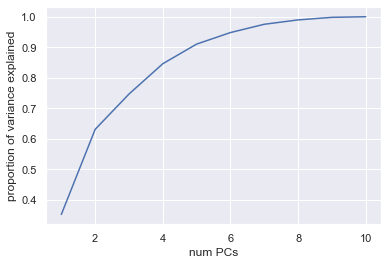

In [16]:
n_samples, n_features = X_standardScaled.shape
Kmax = min(n_samples, n_features)

pca = PCA(n_components=Kmax)
X_transformed = pca.fit_transform(X_standardScaled)
evals = pca.explained_variance_  # eigenvalues in descending order

# Fraction of variance explained

fraction_var = np.cumsum(evals[0:50] / np.sum(evals))

fig, ax = plt.subplots()
xs = np.arange(1, Kmax+1)
ys = fraction_var
plt.xlabel("num PCs")
plt.ylabel("proportion of variance explained")
ax.plot(xs, ys)
plt.show()

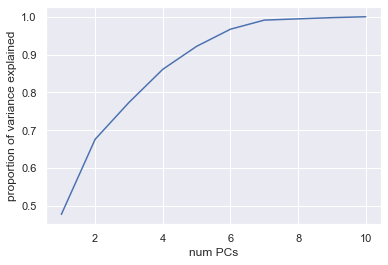

In [17]:
n_samples, n_features = X_withoutOutliers_standardScaled.shape
Kmax = min(n_samples, n_features)

pca = PCA(n_components=Kmax)
X_transformed = pca.fit_transform(X_withoutOutliers_standardScaled)
evals = pca.explained_variance_  # eigenvalues in descending order

# Fraction of variance explained

fraction_var = np.cumsum(evals[0:50] / np.sum(evals))

fig, ax = plt.subplots()
xs = np.arange(1, Kmax+1)
ys = fraction_var
plt.xlabel("num PCs")
plt.ylabel("proportion of variance explained")
ax.plot(xs, ys)
plt.show()

#### scatter plots of reduced variables:

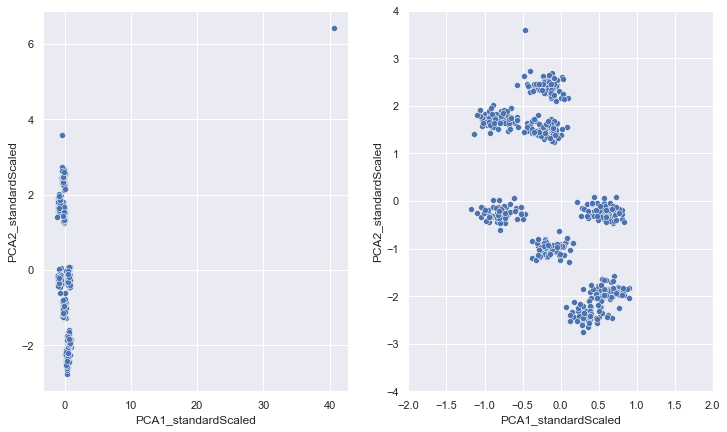

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
plt.subplots_adjust(hspace=0.1)

sns.scatterplot(ax=axs[0], data=df, x="PCA1_standardScaled", y="PCA2_standardScaled", palette="deep") #plots PCA1 vs PCA2

sns.scatterplot(ax=axs[1], data=df, x="PCA1_standardScaled", y="PCA2_standardScaled", palette="deep") #plots PCA1 vs PCA2

axs[1].set_xlim(-2,2)
axs[1].set_ylim(-4,4)

plt.show()

<AxesSubplot:xlabel='PCA1_standardScaled', ylabel='PCA2_standardScaled'>

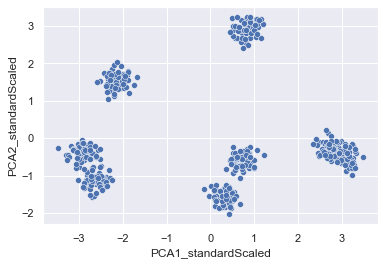

In [16]:
sns.scatterplot(data=df_withoutOutliers, x="PCA1_standardScaled", y="PCA2_standardScaled", palette="deep") #plots PCA1 vs PCA2

## Case 1: training and clustering without outliers

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


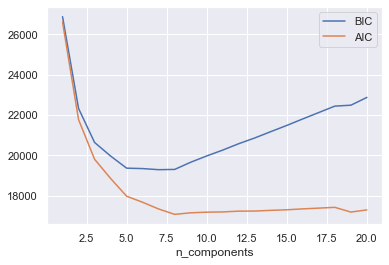

In [17]:
n_components = np.arange(1, 21) # number of components to check for BIC and AIC
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_withoutOutliers) for n in n_components] 
# creates and fits GMM for each component number 

plt.plot(n_components, [m.bic(X_withoutOutliers) for m in models], label='BIC')  # computes BIC for each model and plots
plt.plot(n_components, [m.aic(X_withoutOutliers) for m in models], label='AIC')  # same for AIC

plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

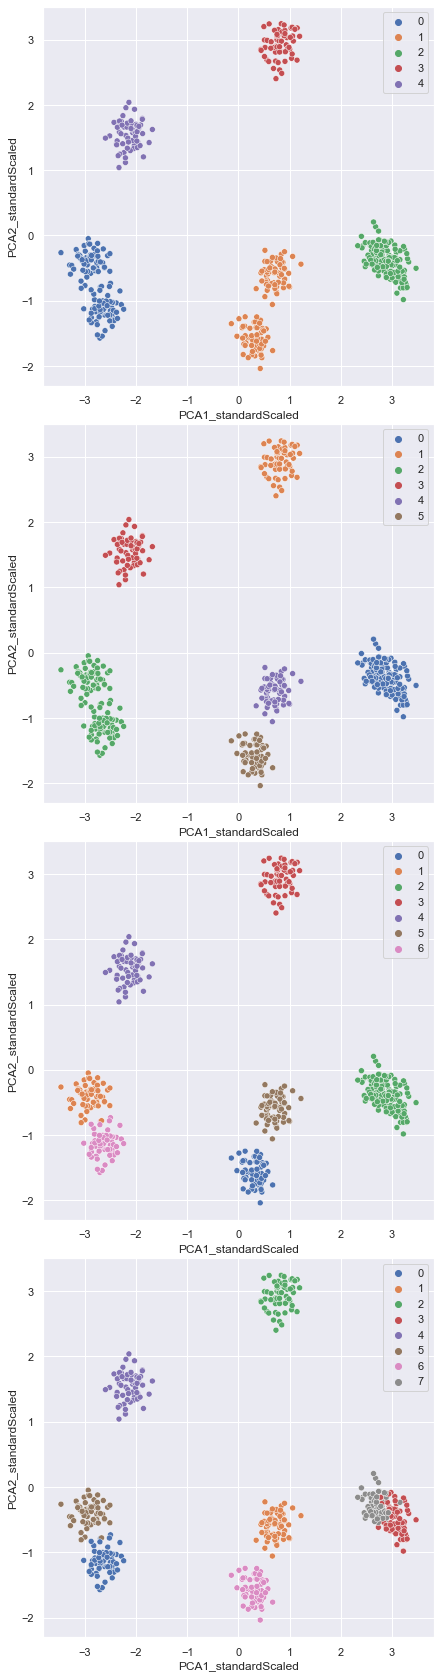

In [18]:
min_number_of_clusters = 5
number_of_models = 4

fig, axs = plt.subplots(nrows=number_of_models, ncols=1, figsize=(7, 30))
plt.subplots_adjust(hspace=0.1)

for i in range(number_of_models):
    gmm = GaussianMixture(n_components = min_number_of_clusters+i).fit(X_withoutOutliers) 
    labels = gmm.predict(X_withoutOutliers)
    sns.scatterplot(ax=axs[i], data=df_withoutOutliers, x="PCA1_standardScaled", y="PCA2_standardScaled", hue=labels, palette="deep")
    
plt.show()

## Case 2: training and clustering with outliers

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


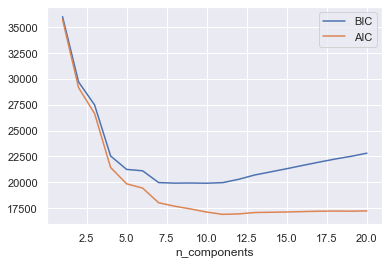

In [19]:
n_components = np.arange(1, 21) # number of components to check for BIC and AIC
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components] 
# creates and fits GMM for each component number 

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')  # computes BIC for each model and plots
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')  # same for AIC

plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

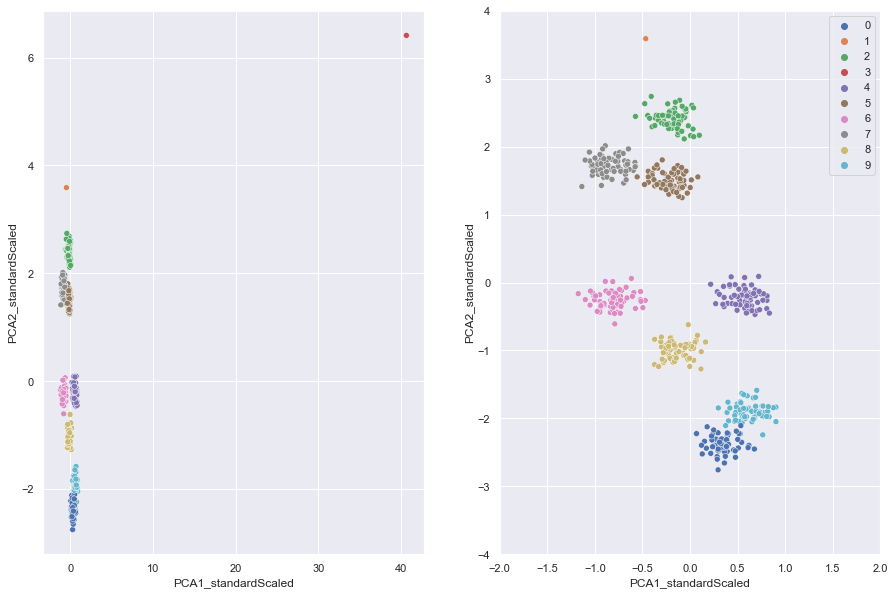

In [20]:
number_of_clusters = 10

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.1)

gmm = GaussianMixture(n_components = number_of_clusters).fit(X) 
labels = gmm.predict(X)

sns.scatterplot(ax=axs[0], data=df, x="PCA1_standardScaled", y="PCA2_standardScaled", hue=labels, palette="deep", legend=False)

sns.scatterplot(ax=axs[1], data=df, x="PCA1_standardScaled", y="PCA2_standardScaled", palette="deep", hue=labels)
axs[1].set_xlim(-2,2)
axs[1].set_ylim(-4,4)

plt.show()

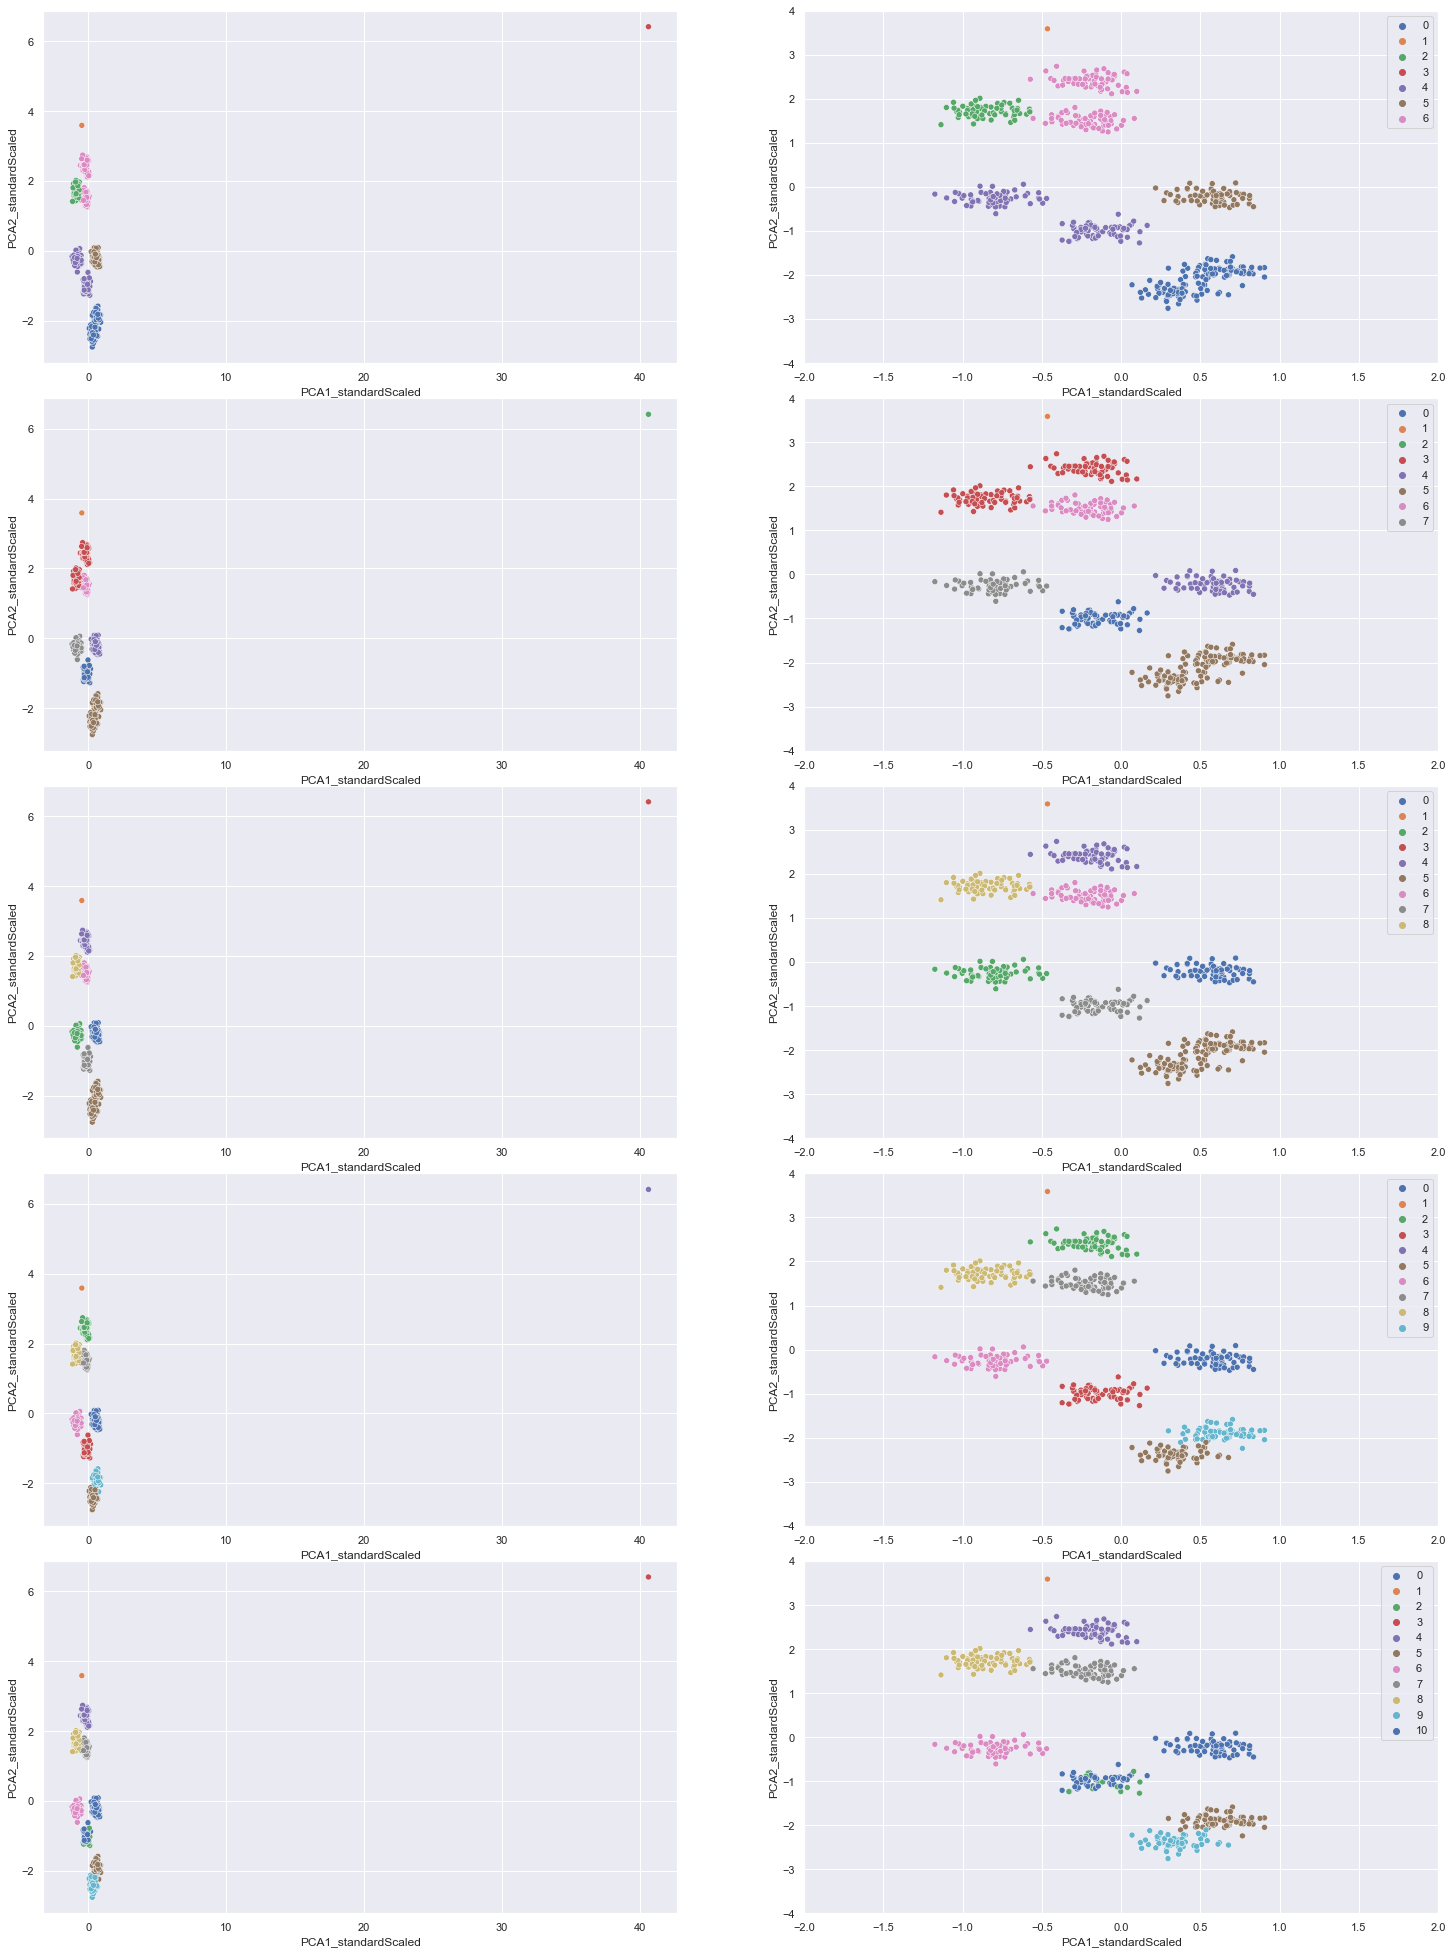

In [21]:
min_number_of_clusters = 7
number_of_models = 5

fig, axs = plt.subplots(nrows=number_of_models, ncols=2, figsize=(25, 35))
plt.subplots_adjust(hspace=0.1)

for i in range(number_of_models):
    gmm = GaussianMixture(n_components = min_number_of_clusters+i).fit(X) 
    labels = gmm.predict(X)
    
    sns.scatterplot(ax=axs[i][0], data=df, x="PCA1_standardScaled", y="PCA2_standardScaled", hue=labels, palette="deep", legend=False)
    
    sns.scatterplot(ax=axs[i][1], data=df, x="PCA1_standardScaled", y="PCA2_standardScaled", palette="deep", hue=labels)
    axs[i][1].set_xlim(-2,2)
    axs[i][1].set_ylim(-4,4)

plt.show()

## Case 3: training without outliers, clustering with

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


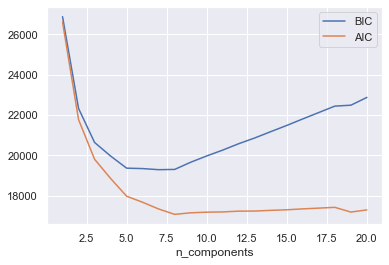

In [22]:
n_components = np.arange(1, 21) # number of components to check for BIC and AIC
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_withoutOutliers) for n in n_components] 
# creates and fits GMM for each component number 

plt.plot(n_components, [m.bic(X_withoutOutliers) for m in models], label='BIC')  # computes BIC for each model and plots
plt.plot(n_components, [m.aic(X_withoutOutliers) for m in models], label='AIC')  # same for AIC

plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

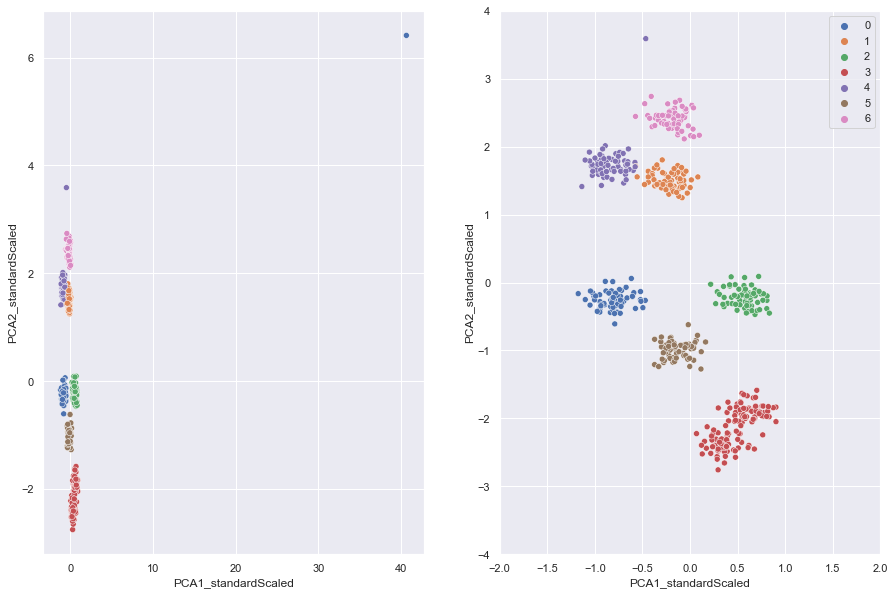

In [23]:
number_of_clusters = 7


gmm = GaussianMixture(n_components = number_of_clusters).fit(X_withoutOutliers) 
labels = gmm.predict(X)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.1)

sns.scatterplot(ax=axs[0], data=df, x="PCA1_standardScaled", y="PCA2_standardScaled", hue=labels, palette="deep", legend=False)

sns.scatterplot(ax=axs[1], data=df, x="PCA1_standardScaled", y="PCA2_standardScaled", palette="deep", hue=labels)
axs[1].set_xlim(-2,2)
axs[1].set_ylim(-4,4)

plt.show()